# Model Evaluation for Heart Disease Dataset

This notebook evaluates Logistic Regression, K-Nearest Neighbors, and Support Vector Machine on the Heart Disease dataset using accuracy score (in percentage), printed confusion matrices, and individual confusion matrix plots for each model.

In [1]:

# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
heart_data = pd.read_csv('/content/heart.csv')

# Converting categorical features to numerical
heart_data_encoded = pd.get_dummies(heart_data, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

# Splitting into features and target
X = heart_data_encoded.drop("HeartDisease", axis=1)
y = heart_data_encoded["HeartDisease"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Accuracy (%): 82.6086956521739
K-Nearest Neighbors Accuracy (%): 86.95652173913044
Support Vector Machine Accuracy (%): 85.32608695652173
Confusion Matrix for Logistic Regression:
[[56 21]
 [11 96]]


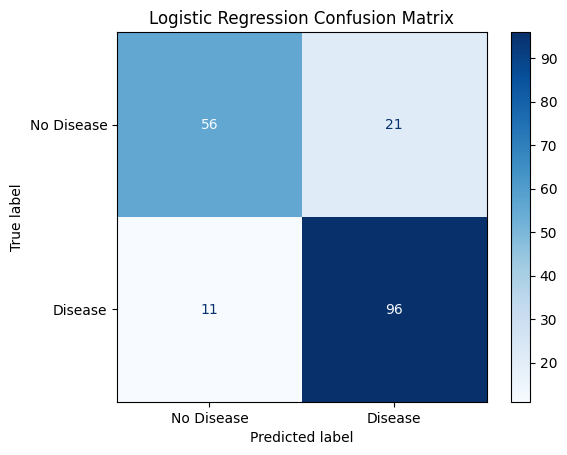

Confusion Matrix for K-Nearest Neighbors:
[[64 13]
 [11 96]]


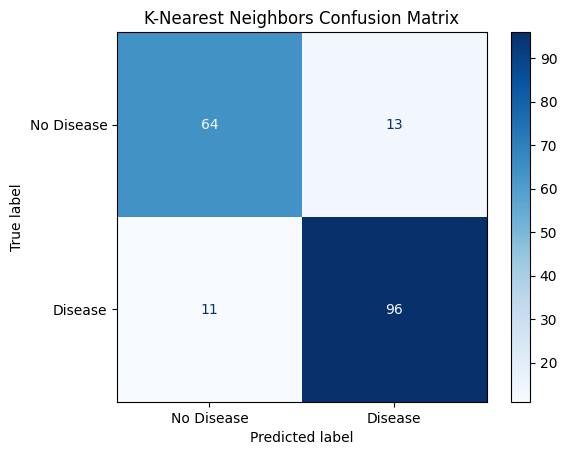

Confusion Matrix for Support Vector Machine:
[[60 17]
 [10 97]]


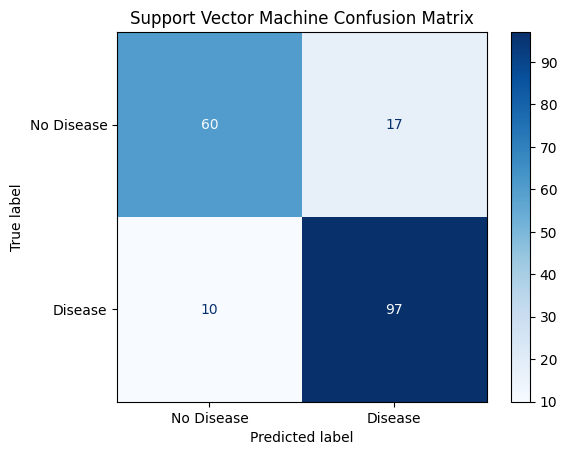

In [2]:

# Model instances with random_state=0
log_reg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svm = SVC(random_state=0)

# Train models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions and Accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test)) * 100
knn_accuracy = accuracy_score(y_test, knn.predict(X_test)) * 100
svm_accuracy = accuracy_score(y_test, svm.predict(X_test)) * 100

print("Logistic Regression Accuracy (%):", log_reg_accuracy)
print("K-Nearest Neighbors Accuracy (%):", knn_accuracy)
print("Support Vector Machine Accuracy (%):", svm_accuracy)

# Individual Confusion Matrix Plots and Printed Confusion Matrices
models = [(log_reg, "Logistic Regression"), (knn, "K-Nearest Neighbors"), (svm, "Support Vector Machine")]
for model, title in models:
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {title}:")
    print(conf_matrix)

    # Display Confusion Matrix Plot
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues", display_labels=["No Disease", "Disease"])
    plt.title(f"{title} Confusion Matrix")
    plt.show()
